In [11]:
import pandas as pd


df = pd.read_csv("C:/Users/OWUSU/Desktop/train.csv",header=0)

In [12]:
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [13]:
x = df.iloc[:,:20]

In [15]:
y = df.iloc[:,-1]

In [16]:
x.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [17]:
y.head(5)

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [19]:
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)

[0.06079924 0.01974265 0.03306326 0.01998569 0.03250976 0.01655294
 0.03427938 0.0327331  0.03586353 0.03348779 0.0339559  0.04734617
 0.04908971 0.39665581 0.03301398 0.03338193 0.03405327 0.01452155
 0.01872412 0.02024022]


In [21]:
feat_importance = pd.Series(model.feature_importances_,index=x.columns)

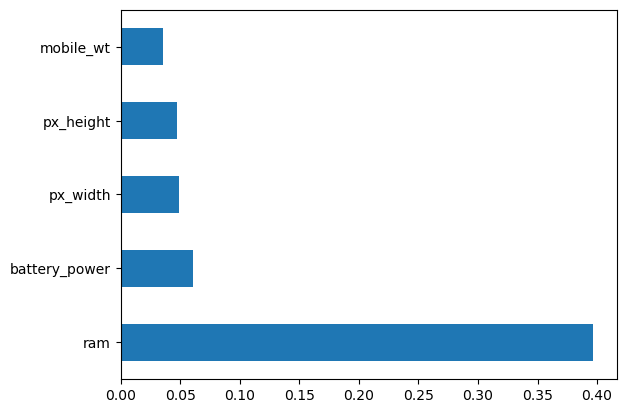

In [22]:
feat_importance.nlargest(5).plot(kind='barh')
plt.show()

In [24]:
from sklearn.feature_selection import SelectKBest,chi2


In [27]:
bestfeatures = SelectKBest(score_func = chi2,k =5)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)

dfcolumns = pd.DataFrame(x.columns)
score = pd.concat([dfcolumns,dfscores],axis=1)

score.columns = ['specs','score']
print(score.nlargest(5,'score'))

            specs          score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863


In [28]:
correlation_matrix = df.corr()

In [35]:
top_corr_features = correlation_matrix.index
plt.figure(figsize=(20,20))

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

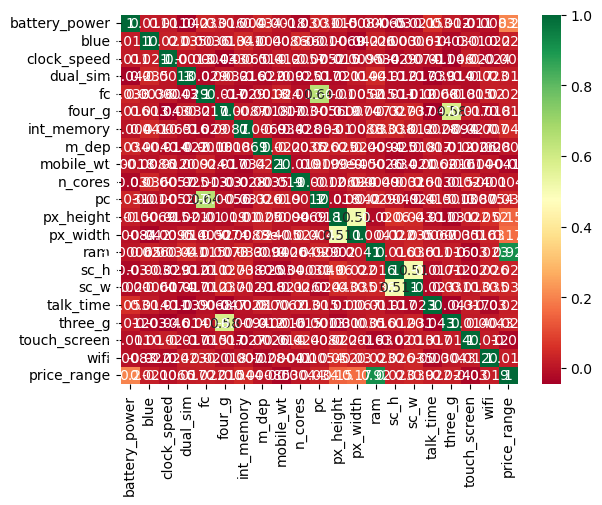

In [40]:
import seaborn as sns
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
threshold = 0.6

df = df[df.columns[df.isnull().mean() < threshold]]

df = df.loc[df.isnull().mean(axis=1) < threshold]

print(df)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [44]:
df = df.fillna(df.mean())

In [45]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [68]:
df2 = pd.read_csv("C:/Users/OWUSU/Desktop/train.csv",header=0)

In [69]:
df2.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


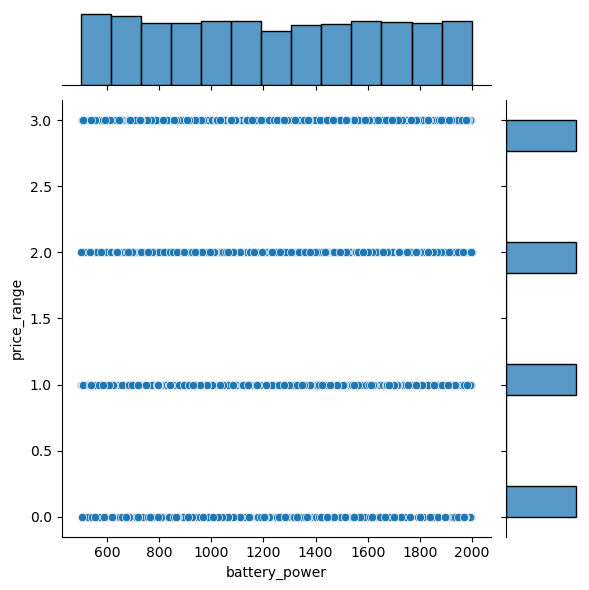

In [70]:
sns.jointplot(x=df2["battery_power"],y=df2["price_range"],data=df2)

In [73]:
factor = 2
upper_lim = df2["battery_power"].mean() + df2["battery_power"].std()*factor
lower_lim = df2["battery_power"].mean() - df2["battery_power"].std()*factor

data = df2[(df2['battery_power'] < upper_lim) & (df2['battery_power'] > lower_lim)]

print(data)

      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       

In [3]:
import numpy as np
df_ = pd.DataFrame({'value': [3,67,-17,44,37,3,31,-38]})
df_['log+1'] = (df_['value']+1).transform(np.log)
df_['log'] = (df_['value']-df_['value'].min()+1).transform(np.log)

In [4]:
print(df_)

   value     log+1       log
0      3  1.386294  3.737670
1     67  4.219508  4.663439
2    -17       NaN  3.091042
3     44  3.806662  4.418841
4     37  3.637586  4.330733
5      3  1.386294  3.737670
6     31  3.465736  4.248495
7    -38       NaN  0.000000


In [8]:
data = pd.DataFrame({'value': [7,25,-47,73,8,22,53-25]})
data['normalized'] = (data['value']-data['value'].min()) / (data['value'].max() - data['value'].min())

In [9]:
print(data)

   value  normalized
0      7    0.450000
1     25    0.600000
2    -47    0.000000
3     73    1.000000
4      8    0.458333
5     22    0.575000
6     28    0.625000


In [14]:
data = pd.DataFrame({'value':[7,25, -47, 73, 8, 22, 53, -25]})
data['standardized'] = (data['value']-data['value'].mean()) / (data['value'].std())

In [15]:
print(data)

   value  standardized
0      7     -0.193539
1     25      0.270954
2    -47     -1.587017
3     73      1.509601
4      8     -0.167733
5     22      0.193539
6     53      0.993498
7    -25     -1.019303


In [16]:
input_data = np.array([[5.1, -2.9, 3.3],
 [-1.2, 7.8, -6.1],
 [3.9, 0.4, 2.1],
 [7.3, -9.9, -4.5]])

In [17]:
from sklearn import preprocessing

In [18]:
binarized_data = preprocessing.Binarizer(threshold=2.1).transform(input_data)

In [19]:
print("\nBinarized_data: \n",binarized_data)


Binarized_data: 
 [[1. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [20]:
print("\nBEFORE:")
print("Mean =", input_data.mean(axis=0))
print("Std deviation =", input_data.std(axis=0))


BEFORE:
Mean = [ 3.775 -1.15  -1.3  ]
Std deviation = [3.12039661 6.36651396 4.0620192 ]


In [21]:
data_scaled = preprocessing.scale(input_data)
print("\nAfter:")
print("mean = ",data_scaled.mean(axis=0))
print("std deviation =",data_scaled.std(axis=0))


After:
mean =  [1.11022302e-16 0.00000000e+00 2.77555756e-17]
std deviation = [1. 1. 1.]


In [22]:
data_scaler_minmax = preprocessing.MinMaxScaler()
data_scaled_minmax = data_scaler_minmax.fit_transform(input_data)
print("\ndata_scaled_minmax: \n",data_scaled_minmax)


data_scaled_minmax: 
 [[0.74117647 0.39548023 1.        ]
 [0.         1.         0.        ]
 [0.6        0.5819209  0.87234043]
 [1.         0.         0.17021277]]


In [23]:
# Normalize data
data_normalized_l1 = preprocessing.normalize(input_data, norm='l1') 
data_normalized_l2 = preprocessing.normalize(input_data, norm='l2') 
print("\nL1 normalized data:\n", data_normalized_l1)
print("\nL2 normalized data:\n", data_normalized_l2)



L1 normalized data:
 [[ 0.45132743 -0.25663717  0.2920354 ]
 [-0.0794702   0.51655629 -0.40397351]
 [ 0.609375    0.0625      0.328125  ]
 [ 0.33640553 -0.4562212  -0.20737327]]

L2 normalized data:
 [[ 0.75765788 -0.43082507  0.49024922]
 [-0.12030718  0.78199664 -0.61156148]
 [ 0.87690281  0.08993875  0.47217844]
 [ 0.55734935 -0.75585734 -0.34357152]]


In [24]:
# Sample input labels
input_labels = ['red', 'black', 'red', 'green', 'black', 'yellow', 
'white']

In [25]:
# Create label encoder and fit the labels 
encoder = preprocessing.LabelEncoder()
encoder.fit(input_labels)


LabelEncoder()

In [26]:
#print the mapping
print("\nLabel mapping:")
for i,item in enumerate(encoder.classes_):
    print(item,'-->',i)


Label mapping:
black --> 0
green --> 1
red --> 2
white --> 3
yellow --> 4


In [27]:
# Encode a set of labels using the encoder 
test_labels = ['green', 'red', 'black'] 
encoded_values = encoder.transform(test_labels) 
print("\nLabels =", test_labels)
print("Encoded values =", list(encoded_values))


Labels = ['green', 'red', 'black']
Encoded values = [1, 2, 0]


In [29]:
# Decode a set of values using the encoder
encoded_values = [3,0,4,1]
decoded_list  = encoder.inverse_transform(encoded_values)
print("\nEncoded_values =",encoded_values)
print("\nDecoded_labels =",list(decoded_list))


Encoded_values = [3, 0, 4, 1]

Decoded_labels = ['white', 'black', 'yellow', 'green']


In [3]:
import numpy as np

In [4]:
# Define sample input data
x = np.array([[3.1, 7.2], [4, 6.7], [2.9, 8], [5.1, 4.5], [6, 5], 
[5.6, 5], [3.3, 0.4], [3.9, 0.9], [2.8, 1], [0.5, 3.4], [1, 4], [0.6, 
4.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

In [5]:
from sklearn import linear_model
import matplotlib.pyplot as plt

In [6]:
classifier = linear_model.LogisticRegression(solver = 'liblinear',C=100)
classifier.fit(x,y)

LogisticRegression(C=100, solver='liblinear')

In [35]:
def visualize_classifier(classifier, x, y):
    min_x, max_x = x.iloc[:, 0].min() - 1.0, x.iloc[:, 0].max() + 1.0
    min_y, max_y = x.iloc[:, 1].min() - 1.0, x.iloc[:, 1].max() + 1.0
    mesh_step_size = 0.01
    x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size), np.arange(min_y, max_y, mesh_step_size))
    output = classifier.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
    output = output.reshape(x_vals.shape)
    plt.figure()
    plt.pcolormesh(x_vals, y_vals, output, cmap=plt.cm.gray)
    plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, s=75, edgecolors='black', linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_vals.min(), x_vals.max())
    plt.ylim(y_vals.min(), y_vals.max())
    plt.xticks((np.arange(int(x.iloc[:, 0].min() - 1), int(x.iloc[:, 0].max() + 1), 1.0)))
    plt.yticks((np.arange(int(x.iloc[:, 1].min() - 1), int(x.iloc[:, 1].max() + 1), 1.0)))
    plt.show()

    

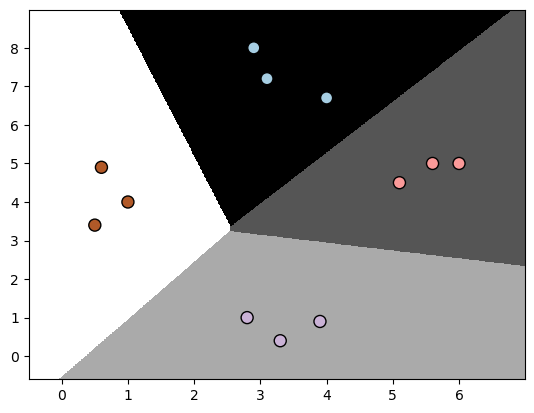

In [15]:
visualize_classifier(classifier, x, y)

In [16]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.naive_bayes import GaussianNB

In [2]:
import pandas as pd
import numpy as np

In [20]:
data = pd.read_table("C:/Users/OWUSU/Desktop/data_multivar_nb.txt",delimiter=',')

In [29]:
data

,2.18,0.57,0
0,4.13,5.12,1
1,9.87,1.95,2
2,4.02,-0.80,3
3,1.18,1.03,0
4,4.59,5.74,1
...,...,...,...
394,3.29,-0.30,3
395,0.55,0.70,0
396,4.40,6.75,1
397,8.71,3.38,2


In [23]:
x,y = data.iloc[:,:-1],data.iloc[:,-1]

In [24]:
x

,2.18,0.57
0,4.13,5.12
1,9.87,1.95
2,4.02,-0.80
3,1.18,1.03
4,4.59,5.74
...,...,...
394,3.29,-0.30
395,0.55,0.70
396,4.40,6.75
397,8.71,3.38


In [25]:
y

0      1
1      2
2      3
3      0
4      1
      ..
394    3
395    0
396    1
397    2
398    3
Name: 0, Length: 399, dtype: int64

In [26]:
classifier = GaussianNB()

In [28]:
classifier.fit(x,y)

GaussianNB()

In [30]:
y_pred = classifier.predict(x)

In [31]:
y_pred

array([1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 3, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0,
       1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2,
       3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1, 2, 3, 0, 1,

In [32]:
accuracy = 100 * (y==y_pred).sum()/x.shape[0]

In [33]:
accuracy

99.74937343358395

C:\Users\OWUSU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


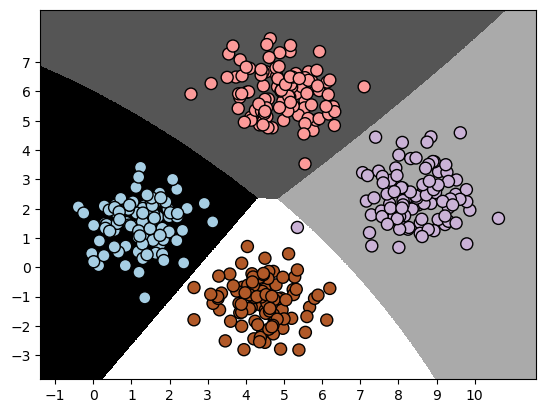

In [36]:
visualize_classifier(classifier,x,y)

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [38]:
x_test

,2.18,0.57
359,0.95,2.12
16,4.97,5.67
364,4.45,4.86
82,4.43,-2.43
107,1.35,2.10
...,...,...
246,4.20,-0.62
10,4.36,-1.27
115,0.62,1.85
74,4.92,-1.34


In [40]:
new_classifier = GaussianNB()
new_classifier.fit(x_train,y_train)
y_test_pred = new_classifier.predict(x_test)

In [43]:
accuracy = 100 * (y_test==y_test_pred).sum()/x_test.shape[0]
accuracy

100.0

C:\Users\OWUSU\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


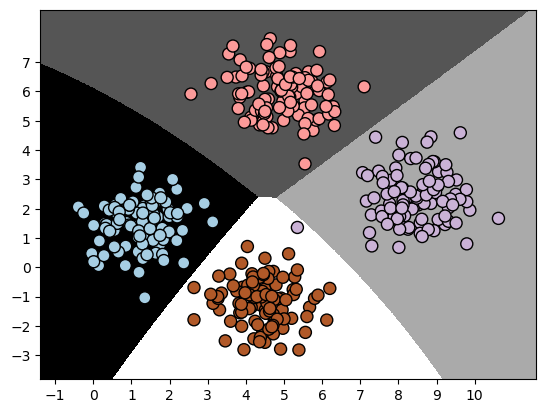

In [44]:
visualize_classifier(new_classifier,x,y)

In [46]:
num_folds = 3
accuracy_score = cross_val_score(classifier,x,y,scoring='accuracy',cv=num_folds)

In [47]:
accuracy_score

array([0.9924812, 1.       , 1.       ])

In [48]:
print("Accuracy :" + str(round(100*accuracy_score.mean(),2))+"%")

Accuracy :99.75%


In [54]:
precision_value = cross_val_score(classifier,x,y,scoring='precision_weighted',cv=num_folds)
print("Precision :" +str(round(100*precision_value.mean(),2))+"%")

Precision :99.76%


MINDSPORE DNN ARCHITECTURE

In [1]:
import numpy as np
import pandas as pd

In [4]:

df = pd.DataFrame({
     'growth':[.5, .7, 1.2],
     'Name':['Paul', 'George', 'Ringo'] 
 })

In [5]:
df


,growth,Name
0,0.5,Paul
1,0.7,George
2,1.2,Ringo


In [6]:
df.shape

(3, 2)

In [7]:
print(np.empty(df.shape))

[[0.5 0. ]
 [0.7 0. ]
 [1.2 0. ]]


In [3]:
df2 = pd.read_csv("C:/Users/OWUSU/Desktop/ML n DL/kaggle/train.csv",header=0)

In [4]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print(df2["Cabin"].head(10))

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object


In [7]:
df2['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [8]:
df2['Cabin'].fillna(df2['Cabin'].value_counts().idxmax(),inplace=True)

In [9]:
df2['Age'].fillna(df2['Age'].median(),inplace=True)

In [10]:
df2['Embarked'].fillna(df2['Embarked'].value_counts().idxmax(),inplace=True)

In [11]:
y = df2['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [12]:
x = df2.loc[:,df2.columns!='Survived']
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
x.loc[0]

PassengerId      1.00
Pclass           3.00
Name           108.00
Sex              1.00
Age             22.00
SibSp            1.00
Parch            0.00
Ticket         523.00
Fare             7.25
Cabin           47.00
Embarked         2.00
Name: 0, dtype: float64

In [14]:
from sklearn import preprocessing

In [15]:
def Encoder(x):
    ColumnsToEncode = list(x.select_dtypes(include=['category','object']))
    le = preprocessing.LabelEncoder()
    for feature in ColumnsToEncode:
        try:
            x[feature] = le.fit_transform(x[feature])
        except:
            print('error encoding '+feature)
    return x        

In [16]:
x = Encoder(x)

C:\Users\OWUSU\AppData\Local\Temp\ipykernel_13208\3865738331.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[feature] = le.fit_transform(x[feature])


In [18]:
print(x)

     PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  \
0              1       3   108    1  22.0      1      0     523   7.2500   
1              2       1   190    0  38.0      1      0     596  71.2833   
2              3       3   353    0  26.0      0      0     669   7.9250   
3              4       1   272    0  35.0      1      0      49  53.1000   
4              5       3    15    1  35.0      0      0     472   8.0500   
..           ...     ...   ...  ...   ...    ...    ...     ...      ...   
886          887       2   548    1  27.0      0      0     101  13.0000   
887          888       1   303    0  19.0      0      0      14  30.0000   
888          889       3   413    0  28.0      1      2     675  23.4500   
889          890       1    81    1  26.0      0      0       8  30.0000   
890          891       3   220    1  32.0      0      0     466   7.7500   

     Cabin  Embarked  
0       47         2  
1       81         0  
2       47        

In [19]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    int32  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int32  
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    int32  
 10  Embarked     891 non-null    int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 59.3 KB


In [47]:
x.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,445.000000,0.647587,29.361582,0.523008,0.381594,338.528620,32.204208,53.639731,1.536476
std,257.353842,0.836071,257.353842,0.477990,13.019697,1.102743,0.806057,200.850657,49.693429,23.568293,0.791503
min,1.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,47.000000,1.000000
50%,446.000000,3.000000,445.000000,1.000000,28.000000,0.000000,0.000000,337.000000,14.454200,47.000000,2.000000
75%,668.500000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,47.000000,2.000000
max,891.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,146.000000,2.000000


In [48]:
x.corr()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.018086,0.013128
Pclass,-0.035144,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,-0.248495,0.162098
Name,-0.038559,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.034129,-0.006117
Sex,0.042939,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,-0.102643,0.108262
Age,0.034212,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,0.060534,-0.018754
SibSp,-0.057527,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,-0.005539,0.068230
Parch,-0.001652,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,0.022682,0.039798
Ticket,-0.056554,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,-0.072200,-0.001729
Fare,0.012658,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,0.090516,-0.224719
Cabin,-0.018086,-0.248495,0.034129,-0.102643,0.060534,-0.005539,0.022682,-0.072200,0.090516,1.000000,0.023804


In [51]:
from sklearn.linear_model import LogisticRegression

In [53]:
clf_b = LogisticRegression()

In [54]:
clf_b.fit(x,y)

C:\Users\OWUSU\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
pred_train = clf_b.predict(x)
pred_train

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [57]:
confusion_matrix(y,pred_train)

array([[467,  82],
       [107, 235]], dtype=int64)

In [58]:
accuracy_score(y,pred_train)

0.7878787878787878

In [61]:
from sklearn.model_selection import GridSearchCV

In [60]:
from sklearn.svm import SVC

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [24]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(x,y)


LinearDiscriminantAnalysis()

In [25]:
y_pred = clf_lda.predict(x)

In [26]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [28]:
accuracy_score(y,y_pred)

0.8024691358024691

In [29]:
test = pd.read_csv("C:/Users/OWUSU/Desktop/ML n DL/kaggle/test.csv",header=0)

In [30]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [32]:
test['Cabin'].fillna(test['Cabin'].value_counts().idxmax(),inplace=True)

In [33]:
test['Age'].fillna(test['Age'].median(),inplace=True)

In [39]:
test['Fare'].fillna(test['Fare'].median(),inplace=True)

In [34]:
test['Embarked'].fillna(test['Embarked'].value_counts().idxmax(),inplace=True)

In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [36]:
test = Encoder(test)

In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    int32  
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    int32  
 8   Fare         418 non-null    float64
 9   Cabin        418 non-null    int32  
 10  Embarked     418 non-null    int32  
dtypes: float64(2), int32(5), int64(4)
memory usage: 27.9 KB


In [41]:
result = clf_lda.predict(test)

In [42]:
result

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [48]:
accuracy_score(y.iloc[:418,],result)

0.49282296650717705